# The Salt Search Process

1. Identify the salt lines in band and "blindly" stack them

For a typical observation in ALMA's Band 6 (a favorite target because of the many convenient lines near CO)

 * [217.980231, 219.614936, 232.509977, 234.251912] GHz
 * ['23Na-35Clv=2-2 J=17-16',
 '23Na-35Clv=1-1 J=17-16',
 '23Na-35Clv=1-1 J=18-17',
 '23Na-35Clv=0-0 J=18-17']

This works well enough if the line is clearly detected and bright.  You can then make an image out of the lines:

<img src="../maud/G17_NaCl_mom0.png">

With a map of this quality, we can obtain the velocity-at-peak-intensity:

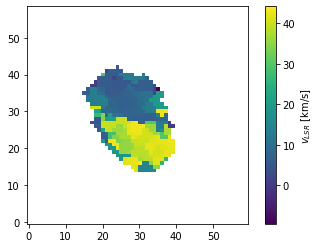

In [1]:
from astropy.io import fits
import pylab as pl; pl.rcParams['figure.facecolor'] = 'w'
data = fits.getdata('../maud/G17_naclstack_vmax.fits')
pl.imshow(data, origin='lower')
cb=pl.colorbar()
cb.set_label('$v_{LSR}$ [km/s]')

We can also look at the spectrum averaged over the whole object:

<img src="../maud/NaCl_stack_spectrum_velocity.png">

This isn't optimal for searching for faint lines, because the spectrum at each position doesn't look like that.

In [2]:
import regions
from astropy import units as u, coordinates
regvsm = regions.CircleSkyRegion(coordinates.SkyCoord('18h22m26.385s −13:30:11.9700', frame='icrs', unit=(u.h, u.deg)), radius=0.15*u.arcsec)

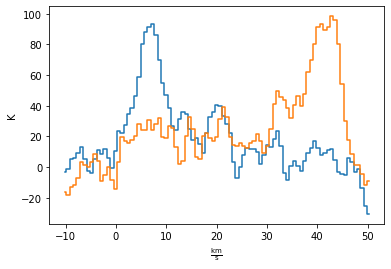

In [3]:
from spectral_cube import SpectralCube
cube = SpectralCube.read('../maud/NaCl_v_le_3_stackcube.fits').subcube_from_regions([regvsm])
cube[:,35,25].quicklook()
cube[:,25,30].quicklook()

This is nicely illustrated with a position-velocity diagram:

<img src="../maud/NaCl_stack_PV_diagram.png">

We can then shift each spectrum to the location of the peak, then average the spectra.

When we do that for this well-behaved source, we come up with a nice average spectrum:

<img src="../maud/spectra/figures/color_labels_G17_SPW2_2017.image_stack.png">

From here, the key thing is to start making rotational diagrams to measure the gas temperature in the disk and star inferring its physical properties.

Questions include:

 * What radii exhibit NaCl and KCl emission?
 * What is the gas temperature at that radius?  
 * Is it consistent with the inferred central stellar mass & luminosity? (~30 Msun)
 * What are the isotope ratios (and how do they compare to Orion?)
 * Is the H-alpha co-spatial with the water and salt?  How is that possible?
 

# What do we do when salt is weak?

G17 and Orion are standouts that have bright NaCl.  There are some that don't have such bright salt or water lines

For these other fields, the process is:

1. Make the salt stack.  See if a line turns up at the right location.  (stacking only 4 lines, though, this doesn't help so much)
2. Check for water; the 232.6 GHz line of water is brighter than the salt lines, so it makes for a nice template if we can find it
3. If we get to this step, we probably have a nondetection.  Then the goal is to get a decent upper limit on the salt / water lines.  I search for a reasonably isolated line of some other species that is compact and use that as the template.

Then, with whichever template we pick, we go through the same process as above: Take each spectrum, shift it to the same velocity, and average.